In [29]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from matplotlib import pyplot as plt

In [20]:
# Matplotlib styles
plt.style.use('ggplot')
plt.rcParams.update({
    'figure.figsize': (15, 4),
    'axes.prop_cycle': plt.cycler(color=["#4C72B0", "#C44E52", "#55A868", "#8172B2", "#CCB974", "#64B5CD"]),
    'axes.facecolor': "#EAEAF2"
})

# Importing Dataset

In [21]:
# Imports the data
df = pd.read_csv("./datasets/alcohol.csv")

# Sets all the column names to lowercase
df.columns = map(str.lower, df.columns)

df

,year,pb,qb,eb,pw,qw,ew,ps,qs,es,tce,cpi
0,1955,54.00,80.5,10.42,54.42,3.35,1.67,60.10,1.475,4.24,258.5,60.33
1,1956,55.17,80.8,10.69,55.44,3.35,1.70,60.17,1.575,4.53,271.2,62.92
2,1957,57.58,81.0,11.18,55.78,3.58,1.83,60.22,1.600,4.61,284.9,64.94
3,1958,58.41,78.4,10.98,57.09,3.52,1.84,61.28,1.625,4.76,299.4,66.79
4,1959,54.18,82.1,10.66,55.43,3.87,1.96,61.59,1.725,5.08,313.7,67.16
5,1960,52.97,85.1,10.81,59.18,3.98,2.12,61.50,1.850,5.44,326.8,67.90
6,1961,57.92,85.1,11.82,62.73,4.09,2.35,67.26,1.925,6.19,341.0,69.74
7,1962,61.25,87.8,12.89,63.59,4.03,2.35,70.42,1.950,6.57,358.3,72.51
8,1963,63.74,87.5,13.37,74.60,4.37,2.98,67.52,2.050,6.62,379.0,73.99
9,1964,67.17,91.1,14.67,82.94,4.66,3.54,71.64,2.200,7.54,401.9,76.38


# Alcohol Consumption Over Time

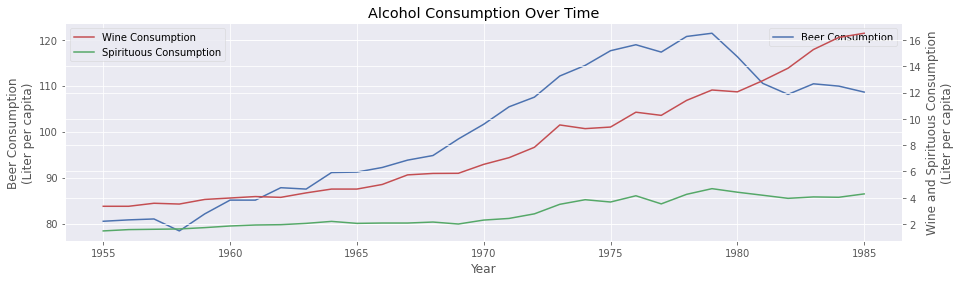

In [22]:
# Plots the graph
fig, ax1 = plt.subplots()

ax1.plot(df['year'], df['qb'], label="Beer Consumption")
ax1.set_ylabel("Beer Consumption\n(Liter per capita)")
ax1.set_xlabel("Year")
ax1.legend()

ax2 = ax1.twinx()
ax2.plot(df['year'], df['qw'], label="Wine Consumption", c="#C44E52")
ax2.plot(df['year'], df['qs'], label="Spirituous Consumption", c="#55A868")
ax2.set_ylabel("Wine and Spirituous Consumption\n(Liter per capita)")
ax2.set_xlabel("Year")
ax2.legend()

plt.title("Alcohol Consumption Over Time")
plt.savefig('./imgs/alcohol_consumption_over_time.png')
plt.show()

# Alcohol Price Over Time

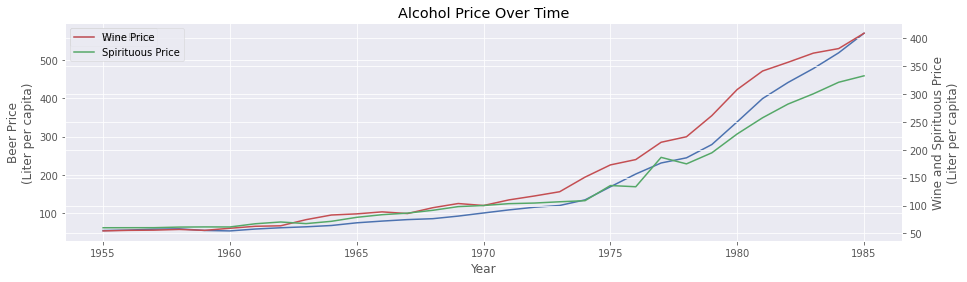

In [23]:
# Plots the graph
fig, ax1 = plt.subplots()

ax1.plot(df['year'], df['pb'], label="Beer Price")
ax1.set_ylabel("Beer Price\n(Liter per capita)")
ax1.set_xlabel("Year")
ax1.legend()

ax2 = ax1.twinx()
ax2.plot(df['year'], df['pw'], label="Wine Price", c="#C44E52")
ax2.plot(df['year'], df['ps'], label="Spirituous Price", c="#55A868")
ax2.set_ylabel("Wine and Spirituous Price\n(Liter per capita)")
ax2.set_xlabel("Year")
ax2.legend()

plt.title("Alcohol Price Over Time")
plt.savefig('./imgs/alcohol_price_over_time.png')
plt.show()

# Log Change of Alcohol Consumption Over Time

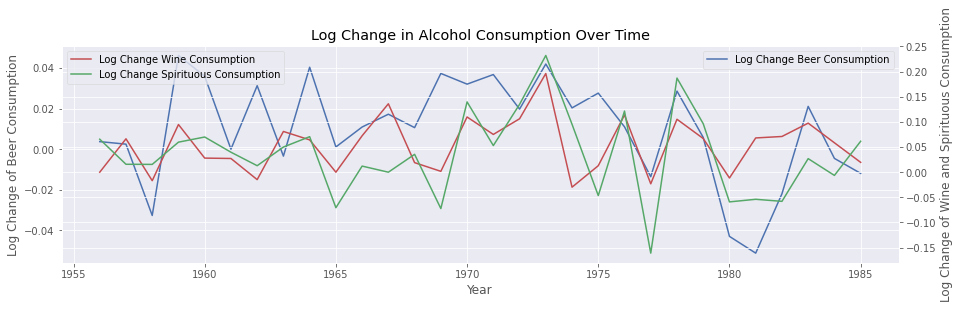

In [24]:
# Obtains the Log Changes
df['log(qb)'] = np.log(df['qb'])
df['log(qw)'] = np.log(df['qw'])
df['log(qs)'] = np.log(df['qs'])

# Plots the graph
fig, ax1 = plt.subplots()

ax1.plot(df['year'], df['log(qb)'].diff(), label="Log Change Beer Consumption")
ax1.set_ylabel("Log Change of Beer Consumption")
ax1.set_xlabel("Year")
ax1.legend()

ax2 = ax1.twinx()
ax2.plot(df['year'], df['log(qw)'].diff(), label="Log Change Wine Consumption", c="#C44E52")
ax2.plot(df['year'], df['log(qs)'].diff(), label="Log Change Spirituous Consumption", c="#55A868")
ax2.set_ylabel("Log Change of Wine and Spirituous Consumption")
ax2.set_xlabel("Year")
ax2.legend()

plt.title("Log Change in Alcohol Consumption Over Time")
plt.savefig('./imgs/log_change_in_alcohol_consumption_over_time.png')
plt.show()

# Log Change of Alcohol Price Over Time

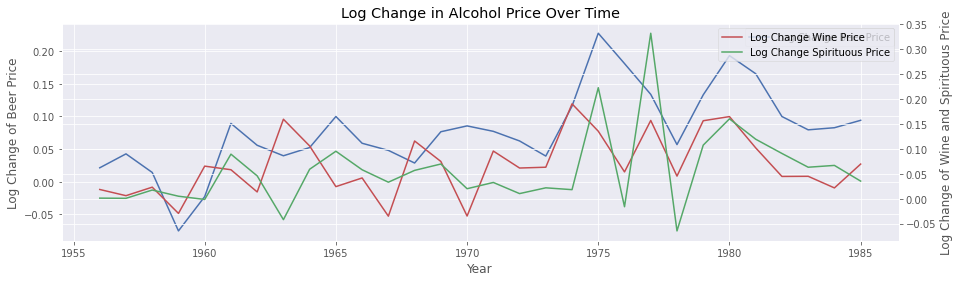

In [25]:
# Obtains the Log Changes
df['log(pb)'] = np.log(df['pb'])
df['log(pw)'] = np.log(df['pw'])
df['log(ps)'] = np.log(df['ps'])

# Plots the graph
fig, ax1 = plt.subplots()

ax1.plot(df['year'], df['log(pb)'].diff(), label="Log Change Beer Price")
ax1.set_ylabel("Log Change of Beer Price")
ax1.set_xlabel("Year")
ax1.legend()

ax2 = ax1.twinx()
ax2.plot(df['year'], df['log(pw)'].diff(), label="Log Change Wine Price", c="#C44E52")
ax2.plot(df['year'], df['log(ps)'].diff(), label="Log Change Spirituous Price", c="#55A868")
ax2.set_ylabel("Log Change of Wine and Spirituous Price")
ax2.set_xlabel("Year")
ax2.legend()

plt.title("Log Change in Alcohol Price Over Time")
plt.savefig('./imgs/log_change_in_alcohol_price_over_time.png')
plt.show()

# Conditional Budget Shares

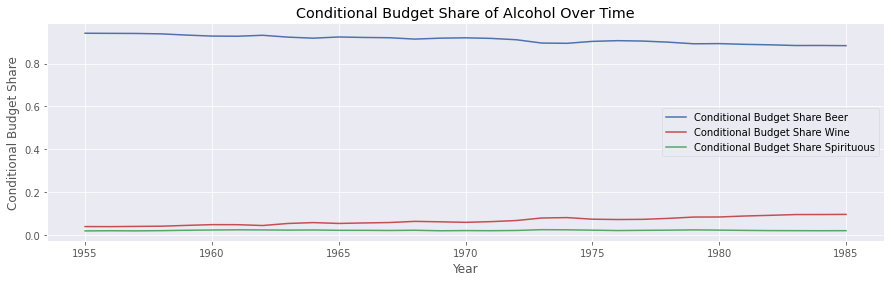

In [26]:
# Obtains the Conditional Budget Shares
df['cbsb'] = df['qb']*df['pb'] / (df['qb']*df['pb'] + df['qw']*df['pw'] + df['qs']*df['ps'])
df['cbsw'] = df['qw']*df['pw'] / (df['qb']*df['pb'] + df['qw']*df['pw'] + df['qs']*df['ps'])
df['cbss'] = df['qs']*df['ps'] / (df['qb']*df['pb'] + df['qw']*df['pw'] + df['qs']*df['ps'])

# Plots the graph
plt.plot(df['year'], df['cbsb'], label="Conditional Budget Share Beer")
plt.plot(df['year'], df['cbsw'], label="Conditional Budget Share Wine")
plt.plot(df['year'], df['cbss'], label="Conditional Budget Share Spirituous")
plt.title("Conditional Budget Share of Alcohol Over Time")
plt.ylabel("Conditional Budget Share")
plt.xlabel("Year")
plt.legend()
plt.savefig('./imgs/conditional_budget_share_in_alcohol_over_time.png')
plt.show()

# Unconditional Budget Shares

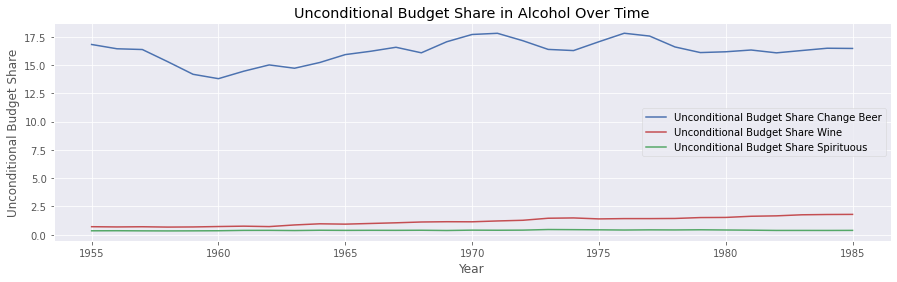

In [27]:
# Obtains the Unconditional Budget Shares
df['ucbsb'] = df['qb']*df['pb'] / df['tce']
df['ucbsw'] = df['qw']*df['pw'] / df['tce']
df['ucbss'] = df['qs']*df['ps'] / df['tce']

# Plots the graph
plt.plot(df['year'], df['ucbsb'], label="Unconditional Budget Share Change Beer")
plt.plot(df['year'], df['ucbsw'], label="Unconditional Budget Share Wine")
plt.plot(df['year'], df['ucbss'], label="Unconditional Budget Share Spirituous")
plt.title("Unconditional Budget Share in Alcohol Over Time")
plt.ylabel("Unconditional Budget Share")
plt.xlabel("Year")
plt.legend()
plt.savefig('./imgs/unconditional_budget_share_in_alcohol_over_time.png')
plt.show()

# Something

In [39]:
# Calculates the price without normalization
df['pb'] = df['eb'] / df['qb']
df['pw'] = df['ew'] / df['qw']
df['ps'] = df['es'] / df['qs']

# Obtains the angular coefficient of the OLS
print(f"Beer angular coef: {sm.OLS(df['qb'], sm.add_constant(df['pb'])).fit().params[1]}")
print(f"Wine angular coef: {sm.OLS(df['qw'], sm.add_constant(df['pw'])).fit().params[1]}")
print(f"Spirituous angular coef: {sm.OLS(df['qs'], sm.add_constant(df['ps'])).fit().params[1]}")

Beer angular coef: 23.703328387798173
Wine angular coef: 3.851141293773304
Spirituous angular coef: 0.21885557113560655


# Something

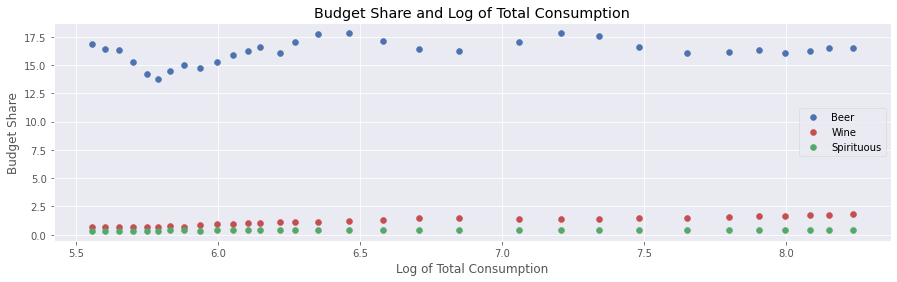

In [43]:
plt.scatter(np.log(df['tce']), df['ucbsb'], label="Beer")
plt.scatter(np.log(df['tce']), df['ucbsw'], label="Wine")
plt.scatter(np.log(df['tce']), df['ucbss'], label="Spirituous")
plt.title("Budget Share and Log of Total Consumption")
plt.xlabel("Log of Total Consumption")
plt.ylabel("Budget Share")
plt.legend()
plt.savefig("./imgs/budget_share_and_log_of_total_consumption.png")
plt.show()

In [47]:
print(f"Average Income Elasticity Beer: {1 + sm.OLS(df['ucbsb'], sm.add_constant(np.log(df[['tce', 'pb', 'pw', 'ps']]))).fit().params[1] / df['ucbsb'].mean()}")
print(f"Average Income Elasticity Wine: {1 + sm.OLS(df['ucbsw'], sm.add_constant(np.log(df[['tce', 'pb', 'pw', 'ps']]))).fit().params[1] / df['ucbsw'].mean()}")
print(f"Average Income Elasticity Spirituous: {1 + sm.OLS(df['ucbss'], sm.add_constant(np.log(df[['tce', 'pb', 'pw', 'ps']]))).fit().params[1] / df['ucbss'].mean()}")

Average Income Elasticity Beer: 0.4969717956971861
Average Income Elasticity Wine: 1.0042680686417167
Average Income Elasticity Spirituous: 1.4114109586793402
